### Exercises Chapter 8 from the Introduction to Statistical Learning book

#### Exercise 3 

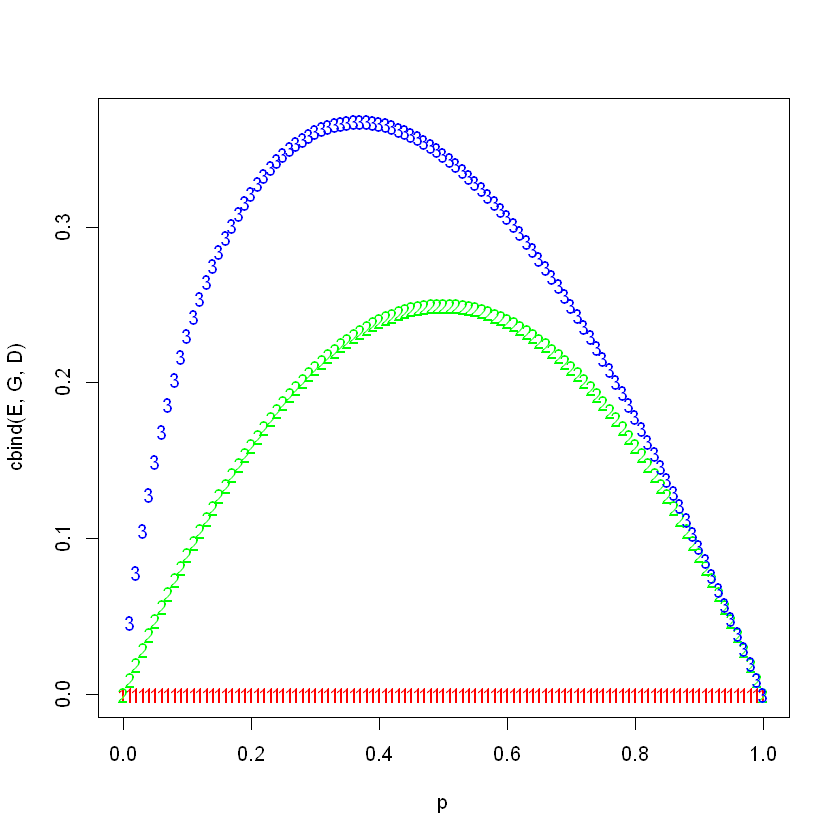

In [17]:
p = seq(0,1,0.01)

#Classification error 
E = 1 - max(p)

#Gini Index 
G = p*(1-p)

#Entropy 
D = -p*log(p)

# Plotting 
matplot(p, cbind(E, G, D), col = c("red", "green", "blue"))

#### Exercise 5

In [20]:
p = c(0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75)

# Majority vote 
print(sum(p>0.5))
print(sum(p<0.5))

# The result being larger for p > 0.5, we assume that the X will be classified in RED class.

# Average probability 
print(mean(p))

# The results being 0.45, therefore smaller than 50%, we assume that X will be part of the GREEN class. 

[1] 6
[1] 4
[1] 0.45


#### Exercise 8

In [57]:
#(a)

library(ISLR)
attach(Carseats)

set.seed(123)
train = sample(1:nrow(Carseats), 200)
Carseats.train = Carseats[train,]
Carseats.test = Carseats[-train,]

The following objects are masked from Carseats (pos = 3):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US


The following objects are masked from Carseats (pos = 4):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US


The following objects are masked from Carseats (pos = 5):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US


The following objects are masked from Carseats (pos = 6):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US


The following objects are masked from Carseats (pos = 8):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US


The following objects are masked from Carseats (pos = 9):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US


The following ob

[1] 4.395357


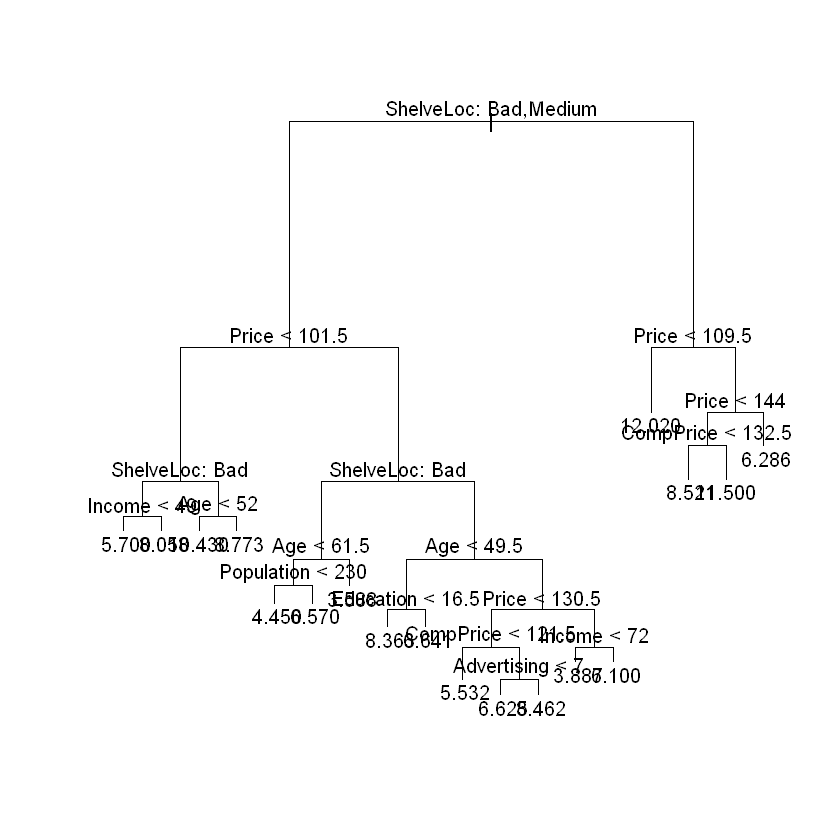

In [58]:
#(b)
library(tree)
tree.carseats = tree(Sales~., Carseats, subset=train)
plot(tree.carseats)
text(tree.carseats, pretty = 0)
tree.pred = predict(tree.carseats, Carseats.test)
MSE = mean((tree.pred-Carseats.test$Sales)^2)
print(MSE)

# MSE is 4.40

[1] 4.658628


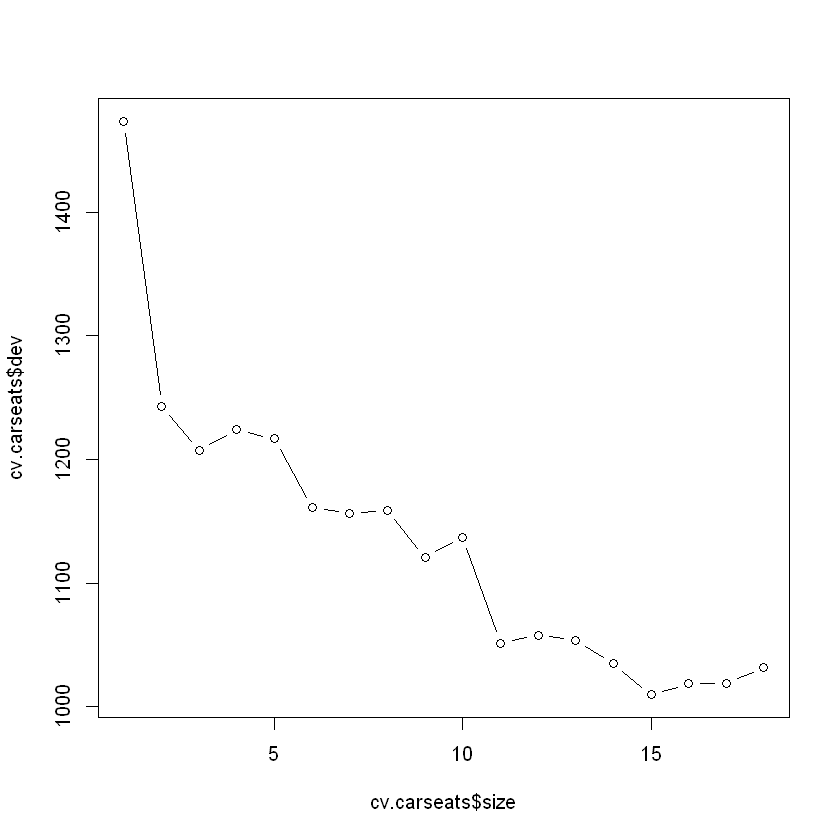

In [59]:
#(c)
cv.carseats = cv.tree(tree.carseats)
plot(cv.carseats$size, cv.carseats$dev, type = 'b')

prune.carseats = prune.tree(tree.carseats, best = 14)

prune.pred = predict(prune.carseats, Carseats.test)

MSE.prune = mean((prune.pred-Carseats.test$Sales)^2)
print(MSE.prune)

# The MSE after pruning is 4.66 which is higher 

In [70]:
#(d)
library(randomForest)
set.seed(123)
bag.carseats = randomForest(Sales~., data = Carseats, subset = train, mtry = 10, importance = TRUE)
bag.carseats

bag.pred = predict(bag.carseats, Carseats.test)

MSE.bag = mean((bag.pred - Carseats.test$Sales)^2)
MSE.bag

# Bagging the model improves the MSE, which is now at 2.76 

importance(bag.carseats)
#The three most important variables are the Price, ShelveLoc and CompPrice


Call:
 randomForest(formula = Sales ~ ., data = Carseats, mtry = 10,      importance = TRUE, subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 10

          Mean of squared residuals: 2.912487
                    % Var explained: 59.53

[1] 2.76144

,%IncMSE,IncNodePurity
CompPrice,20.3414969,158.911610
Income,6.6237140,90.369331
Advertising,5.7777253,72.793558
Population,-2.2001506,55.786278
Price,44.3578602,380.255094
ShelveLoc,48.3345635,387.886972
Age,18.6296851,187.107660
Education,2.6619834,55.987493
Urban,0.9276070,8.152320
US,0.4202302,5.900097


In [73]:
#(e)
set.seed(123)
rf.carseats = randomForest(Sales~., data = Carseats, subset = train, mtry = 5, importance = TRUE)
rf.pred = predict(rf.carseats, Carseats.test)

MSE.rf = mean((rf.pred - Carseats.test$Sales)^2)
MSE.rf

#MSE is not better with random forest at it is higher than with bagging at 3.02

importance(rf.carseats)

#However, the important variables are the same with bagging and random forest

[1] 3.01707

,%IncMSE,IncNodePurity
CompPrice,15.6874802,152.97700
Income,6.1782093,104.83134
Advertising,7.4822778,89.84070
Population,0.1519680,74.70762
Price,35.6880806,345.59391
ShelveLoc,42.1336259,333.55620
Age,18.3059283,204.29930
Education,1.8670124,63.31604
Urban,-0.1467837,11.01253
US,0.3849865,11.47038


#### Exercise 9

In [76]:
#(a)
attach(OJ)

train = sample(1:nrow(OJ), 800)
OJ.train = OJ[train, ]
OJ.test = OJ[-train, ]

The following objects are masked from OJ (pos = 3):

    DiscCH, DiscMM, ListPriceDiff, LoyalCH, PctDiscCH, PctDiscMM,
    PriceCH, PriceDiff, PriceMM, Purchase, SalePriceCH, SalePriceMM,
    SpecialCH, SpecialMM, STORE, Store7, StoreID, WeekofPurchase


The following objects are masked from OJ (pos = 4):

    DiscCH, DiscMM, ListPriceDiff, LoyalCH, PctDiscCH, PctDiscMM,
    PriceCH, PriceDiff, PriceMM, Purchase, SalePriceCH, SalePriceMM,
    SpecialCH, SpecialMM, STORE, Store7, StoreID, WeekofPurchase




In [78]:
#(b)
tree.OJ = tree(Purchase~., OJ, subset=train)
summary(tree.OJ)

# The training error rate is 0.17
# There are 8 terminal nodes in this tree 


Classification tree:
tree(formula = Purchase ~ ., data = OJ, subset = train)
Variables actually used in tree construction:
[1] "LoyalCH"     "PriceDiff"   "SalePriceMM"
Number of terminal nodes:  8 
Residual mean deviance:  0.7787 = 616.7 / 792 
Misclassification error rate: 0.1688 = 135 / 800 

In [80]:
#(c)
tree.OJ
# The terminal node is seen as the one with an asterisk, for instance 4) 
# This terminal node comes from a LoyalCH under 0.50 and a LoyalCH under 0.14
# In this terminal node there are 102 observations 
# The deviance of this node is 51.020
# We can see that the majority is a MM purchase because there is 93% YES

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1073.000 CH ( 0.60500 0.39500 )  
   2) LoyalCH < 0.5036 362  436.000 MM ( 0.29006 0.70994 )  
     4) LoyalCH < 0.136698 102   51.020 MM ( 0.06863 0.93137 ) *
     5) LoyalCH > 0.136698 260  344.500 MM ( 0.37692 0.62308 )  
      10) PriceDiff < 0.115 111  115.900 MM ( 0.21622 0.78378 ) *
      11) PriceDiff > 0.115 149  206.600 MM ( 0.49664 0.50336 )  
        22) LoyalCH < 0.432335 95  127.000 MM ( 0.38947 0.61053 ) *
        23) LoyalCH > 0.432335 54   67.270 CH ( 0.68519 0.31481 ) *
   3) LoyalCH > 0.5036 438  346.200 CH ( 0.86530 0.13470 )  
     6) PriceDiff < -0.39 23   28.270 MM ( 0.30435 0.69565 ) *
     7) PriceDiff > -0.39 415  276.400 CH ( 0.89639 0.10361 )  
      14) LoyalCH < 0.705326 134  142.500 CH ( 0.77612 0.22388 )  
        28) SalePriceMM < 2.105 89  112.400 CH ( 0.67416 0.32584 ) *
        29) SalePriceMM > 2.105 45    9.591 CH ( 0.97778 0.02222 ) *
      15) LoyalCH > 0.705326 

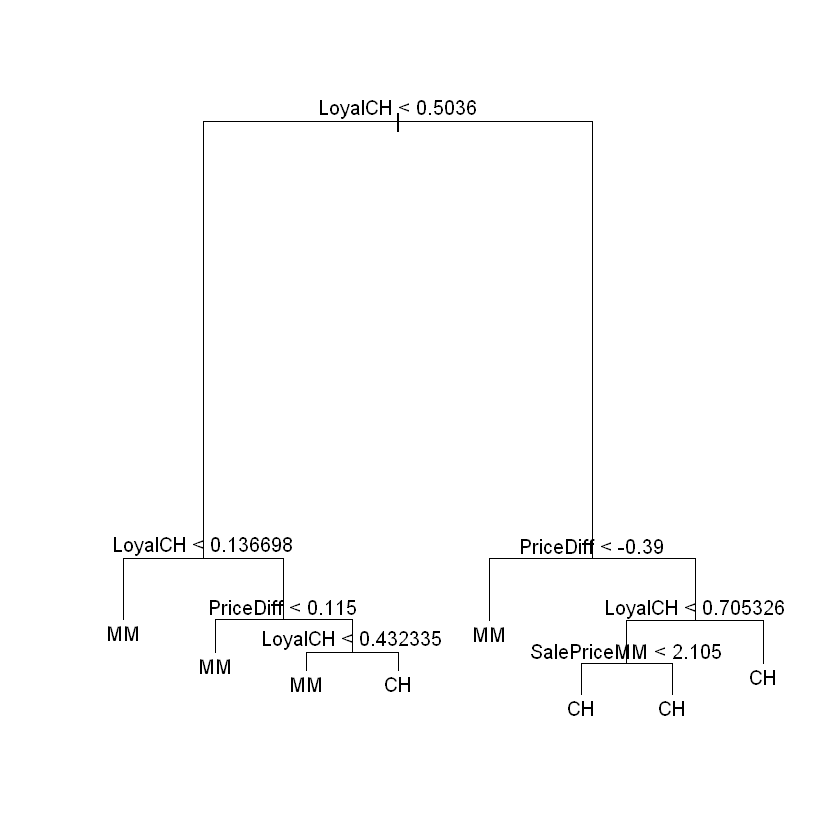

In [88]:
#(d)
plot(tree.OJ)
text(tree.OJ, pretty = 0)

# For all the observations that have a LoyalCH under 0.5, expect for those that have a PriceDiff over 0.115 
# and a LoyalCH over 0.43, the purchase will be of type MM. Otherwise, all purchases are CH types 

In [90]:
#(e)
oj.pred = predict(tree.OJ, OJ.test, type = "class")
table(OJ.test$Purchase, oj.pred)

#error rate 
(143+80)/800

    oj.pred
      CH  MM
  CH 143  26
  MM  21  80

[1] 0.27875

In [92]:
#(f)
cv.OJ = cv.tree(tree.OJ)
cv.OJ

$size
[1] 8 7 6 5 4 3 2 1

$dev
[1]  773.4677  744.4464  742.6095  745.4455  753.9918  792.7783  791.3513
[8] 1075.0647

$k
[1]      -Inf  12.26076  20.57221  22.06735  28.53740  40.45892  41.60382
[8] 291.27596

$method
[1] "deviance"

attr(,"class")
[1] "prune"         "tree.sequence"

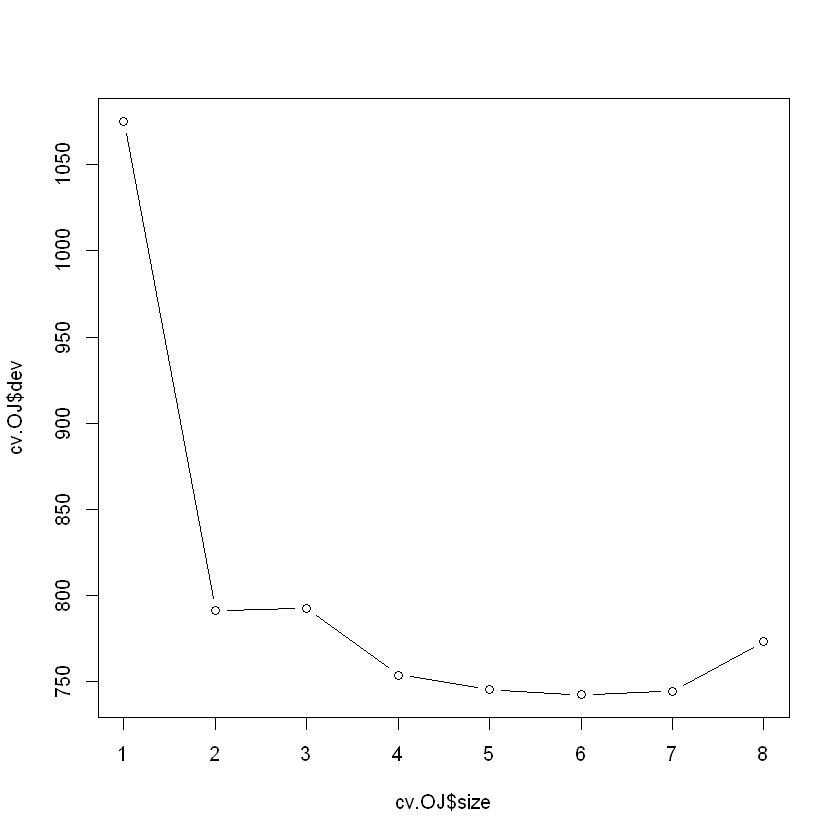

In [93]:
#(g)
plot(cv.OJ$size, cv.OJ$dev, type = "b")

In [85]:
#(h)
# The tree size that corresponds to the lowest cross-validated classification error rate would be 6.

In [95]:
#(i)
prune.OJ = prune.tree(tree.OJ, best = 6)
prune.OJ

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1073.00 CH ( 0.60500 0.39500 )  
   2) LoyalCH < 0.5036 362  436.00 MM ( 0.29006 0.70994 )  
     4) LoyalCH < 0.136698 102   51.02 MM ( 0.06863 0.93137 ) *
     5) LoyalCH > 0.136698 260  344.50 MM ( 0.37692 0.62308 )  
      10) PriceDiff < 0.115 111  115.90 MM ( 0.21622 0.78378 ) *
      11) PriceDiff > 0.115 149  206.60 MM ( 0.49664 0.50336 ) *
   3) LoyalCH > 0.5036 438  346.20 CH ( 0.86530 0.13470 )  
     6) PriceDiff < -0.39 23   28.27 MM ( 0.30435 0.69565 ) *
     7) PriceDiff > -0.39 415  276.40 CH ( 0.89639 0.10361 )  
      14) LoyalCH < 0.705326 134  142.50 CH ( 0.77612 0.22388 ) *
      15) LoyalCH > 0.705326 281  105.30 CH ( 0.95374 0.04626 ) *

In [106]:
#(j)
summary(prune.OJ)
summary(tree.OJ)

# It is possible to see that the error rate is lower when the tree has not been pruned than when it has been pruned. 


Classification tree:
snip.tree(tree = tree.OJ, nodes = c(11L, 14L))
Variables actually used in tree construction:
[1] "LoyalCH"   "PriceDiff"
Number of terminal nodes:  6 
Residual mean deviance:  0.8181 = 649.5 / 794 
Misclassification error rate: 0.1938 = 155 / 800 


Classification tree:
tree(formula = Purchase ~ ., data = OJ, subset = train)
Variables actually used in tree construction:
[1] "LoyalCH"     "PriceDiff"   "SalePriceMM"
Number of terminal nodes:  8 
Residual mean deviance:  0.7787 = 616.7 / 792 
Misclassification error rate: 0.1688 = 135 / 800 

In [110]:
#(k)
prune.pred = predict(prune.OJ, OJ.test, type = 'class')
table(prune.pred, OJ.test$Purchase)

# test error rate 
(136+84)/800 

# the test error rate is similar to that of when the tree is not pruned. 

          
prune.pred  CH  MM
        CH 136  17
        MM  33  84

[1] 0.275

#### Exercise 10